# 시가총액 데이터 분석 I


1. pandas if conditions
1. 새열 추가
1. pandas where()
1. np.where 결합
1. loc,iloc 인덱싱
1. loc if-then
1. applymap
1. Grouping
1. Pivot

### 코랩: 한글 폰트 설치

1. 한글 폰트 설치

```sh
#폰트 설치
! apt install fonts-nanum*
```

```sh
! apt install fontconfig
```

2. 폰트 캐시 생성

```sh
#폰트 캐시 생성
!fc-cache -fv
```

3. matplotlib에 남아있는 font 캐시 삭제

```sh
# matplotlib에 남아있는 font 캐시 삭제
!rm -rf ~/.cache/matplotlib/*
```

4. Runtime 재실행

5. matplotlib 에서 Nanum 한글 폰트 검색 확인

```python
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)
```

### 필요 라이브러리

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [ ]:
#폰트 설치
! apt install fonts-nanum*

In [ ]:
! apt install fontconfig

In [ ]:
#폰트 캐시 생성
!fc-cache -fv

In [5]:
# matplotlib에 남아있는 font 캐시 삭제
!rm -rf ~/.cache/matplotlib/*

In [ ]:
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

Text(0.5, 1.0, '한글 타이틀...')

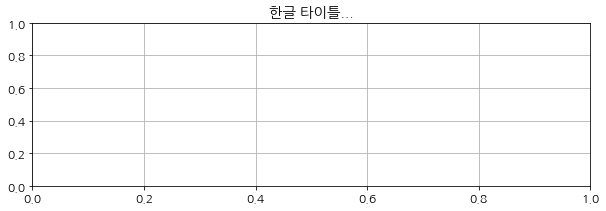

In [4]:
# 전역 폰트 설정 사용
# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

# 2021 시가총액데이터

- https://financedata.github.io/marcap/

raw 데이터는 폴더에 년도별 gz 압축파일로 저장해서 병합해 사용.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! ls drive/MyDrive/datasets-dbins/*.gz

drive/MyDrive/datasets-dbins/marcap-2021.csv.gz


`marcap-2021.csv.gz` 형식으로 저장되어 있다.


Date (날짜)를 인덱스(DatetimeIndex)로 포함하고 있으며, 컬럼 구성은 다음과 같습니다.

- Date : 날짜 (DatetimeIndex)
- Rank: 시가총액 순위 (당일)
- Code : 종목코드
- Name : 종명이름
- Open : 시가
- High : 고가
- Low : 저가
- Close : 종가
- Volume : 거래량
- Amount : 거래대금
- Changes : 전일대비
- ChangeCode: 등락 기호
- ChagesRatio : 전일대비 등락률
- Marcap : 시가총액(백만원)
- Stocks : 상장주식수
- MarketId : 시장기호
- Market : 시장
- Dept : 부서(한국거래소)

In [7]:
pd.options.display.float_format = '{:.1f}'.format

df2021 = pd.read_csv('drive/MyDrive/datasets-dbins/marcap-2021.csv.gz')
df2021.head(3)

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId
0,005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK
1,000660,SK하이닉스,KOSPI,NaN,118500,1000,0.8,118500,120000,118000,3227201,383650636500,86268280252500,728002365,2021-05-14,2,1,STK
2,207940,삼성바이오로직스,KOSPI,NaN,948000,82000,9.5,901000,948000,866000,1010588,921105771000,62724420000000,66165000,2021-05-14,3,1,STK


자료의 전체 정보를 보자

In [8]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442945 entries, 0 to 442944
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Code         442945 non-null  object 
 1   Name         442945 non-null  object 
 2   Market       442945 non-null  object 
 3   Dept         282865 non-null  object 
 4   Close        442945 non-null  int64  
 5   Changes      442945 non-null  int64  
 6   ChagesRatio  442945 non-null  float64
 7   Open         442945 non-null  int64  
 8   High         442945 non-null  int64  
 9   Low          442945 non-null  int64  
 10  Volume       442945 non-null  int64  
 11  Amount       442945 non-null  int64  
 12  Marcap       442945 non-null  int64  
 13  Stocks       442945 non-null  int64  
 14  Date         442945 non-null  object 
 15  Rank         442945 non-null  int64  
 16  ChangeCode   442945 non-null  int64  
 17  MarketId     442945 non-null  object 
dtypes: float64(1), int64(11)

## if conditions

컬럼에 대해 if 처리

In [10]:
df2021['Code'] == '005930'

0          True
1         False
2         False
3         False
4         False
          ...  
442940    False
442941    False
442942    False
442943    False
442944    False
Name: Code, Length: 442945, dtype: bool

In [ ]:
df005930 = df2021.loc[df2021.Code == '005930'].copy()

In [11]:
# 종목코드 데이터만 추출
# df005930 = df2021[df2021['Code'] == '005930']
df005930 = df2021.loc[df2021.Code == '005930']
df005930.head(3)

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId
0,005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK
2560,005930,삼성전자,KOSPI,NaN,80100,500,0.6,79800,80400,79400,12360199,988665902752,478179582255000,5969782550,2021-05-28,1,1,STK
5131,005930,삼성전자,KOSPI,NaN,80000,-100,-0.1,80000,80400,79900,8753097,701206526029,477582604000000,5969782550,2021-07-02,1,2,STK


In [12]:
df005930.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 440379
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         173 non-null    object 
 1   Name         173 non-null    object 
 2   Market       173 non-null    object 
 3   Dept         0 non-null      object 
 4   Close        173 non-null    int64  
 5   Changes      173 non-null    int64  
 6   ChagesRatio  173 non-null    float64
 7   Open         173 non-null    int64  
 8   High         173 non-null    int64  
 9   Low          173 non-null    int64  
 10  Volume       173 non-null    int64  
 11  Amount       173 non-null    int64  
 12  Marcap       173 non-null    int64  
 13  Stocks       173 non-null    int64  
 14  Date         173 non-null    object 
 15  Rank         173 non-null    int64  
 16  ChangeCode   173 non-null    int64  
 17  MarketId     173 non-null    object 
dtypes: float64(1), int64(11), object(6)
memory usag

In [13]:
df2021.Code > '005930'

0         False
1         False
2          True
3          True
4          True
          ...  
442940     True
442941     True
442942     True
442943     True
442944     True
Name: Code, Length: 442945, dtype: bool

In [ ]:
df2021.loc[df2021.Code > '005930']

In [ ]:
bb

In [ ]:
# 종목중 종가가 80000 이하인 경우만 추출
df = df005930.loc[df005930.Close <= 80000]
df

조건에 대한 결과는 여러 연산을 연결 할 수 있다.

In [ ]:
# 종가가 80000 미만인 날짜만 출력.
df005930.loc[df005930.Close <= 80000]['Date'].unique()

다중 조건도 가능

In [15]:
# 종가가 80000원 미만이고 5/1일 이후만 출력!
df005930.loc[(df005930.Close <= 80000) & (df005930.Date >= '2021-05-01')].head(3)

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId
5131,005930,삼성전자,KOSPI,NaN,80000,-100,-0.1,80000,80400,79900,8753097,701206526029,477582604000000,5969782550,2021-07-02,1,2,STK
7704,005930,삼성전자,KOSPI,NaN,79800,-800,-1.0,80100,80100,79500,10859399,865953289940,476388647490000,5969782550,2021-07-16,1,2,STK
17888,005930,삼성전자,KOSPI,NaN,79600,-500,-0.6,80800,80900,79200,17740855,1414228804206,475194690980000,5969782550,2021-05-17,1,2,STK


### 연습) 5/1일 이전 10일 시가와 종가를 그래프로 그려보자

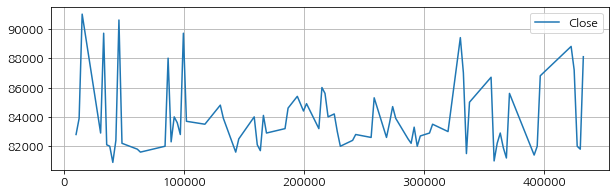

In [16]:
df005930.loc[(df005930.Date < '2021-05-01')][['Close']].plot()

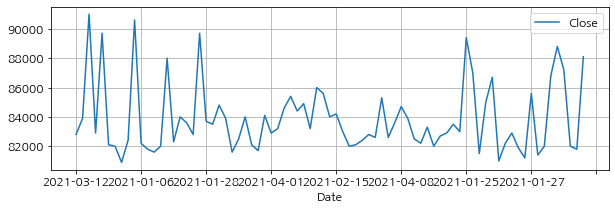

In [17]:
df005930.loc[(df005930.Date < '2021-05-01')][['Date','Close']].plot(x='Date')

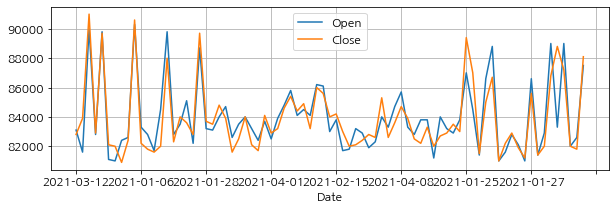

In [18]:
# 여러 종속변수를 지정
df005930.loc[(df005930.Date < '2021-05-01')].plot(x='Date', y=['Open', 'Close'])

10일 이전 데이터

In [ ]:
df = df005930.loc[(df005930.Date < '2021-05-01')]
df

In [ ]:
df[:-10]

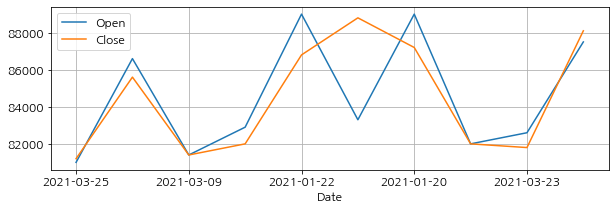

In [24]:
df005930.loc[(df005930.Date < '2021-05-01')][-10:].plot(x='Date', y=['Open', 'Close'])

### 연습) 5/1일 이후 10일 종가를 그래프로 그려보자

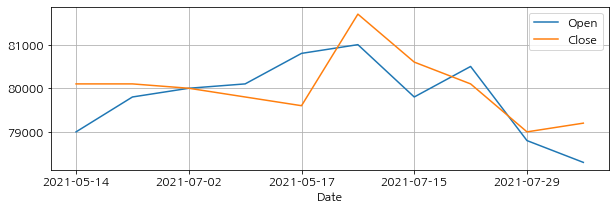

In [25]:
df005930.loc[(df005930.Date > '2021-05-01')][:10].plot(x='Date', y=['Open', 'Close'])

## 새 열 추가에 대해서

새 열을 추가시 아래 같은 경고는 원천이 되는 DataFrame의 일부로 구성된 파생 DataFrame에 변경을 가하는 경우 발생합니다.

![image.png](attachment:8289da17-a336-4453-8734-37d48c66a6da.png)

아래의 경우 df005930 데이터 프레임은 df의 파생으로, 이런 경우 새로운 열 등에 대한 작업시 위 같은 경고를 나타난다.

In [28]:
# 데이터에 직접 열을 추가할 경우.
df005930['Status'] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df2021.head()

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId
0,005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK
1,000660,SK하이닉스,KOSPI,NaN,118500,1000,0.8,118500,120000,118000,3227201,383650636500,86268280252500,728002365,2021-05-14,2,1,STK
2,207940,삼성바이오로직스,KOSPI,NaN,948000,82000,9.5,901000,948000,866000,1010588,921105771000,62724420000000,66165000,2021-05-14,3,1,STK
3,005935,삼성전자우,KOSPI,NaN,73900,1700,2.4,72700,74000,72700,1058711,77733475100,60811327130000,822886700,2021-05-14,4,1,STK
4,051910,LG화학,KOSPI,NaN,854000,4000,0.5,852000,865000,846000,218492,186910631000,60285860922000,70592343,2021-05-14,5,1,STK


아래같이 원천 데이터프레임에 직접 추가하면 경고가 나타나지 않는다.

In [31]:
# 원천 데이터프레임에 직접 추가해 보면
df2021['Status'] = False

In [ ]:
del df2021['Status']

#### 안전한 새 열 추가

파생한 데이터 프레임은 `.copy()` 를 통해 새 객체를 생성해서 사용한다.
> 위 경고를 없애는 방법도 있지만 원인 제거는 아니므로 패스...

In [ ]:
# 방법1
#df005930 = df2021.loc[df2021.Code == '005930'].copy()

In [ ]:
# 방법2
df005930_low = df005930.copy()
df005930_low['Status'] = False

## `pd.where()` 기본

조건을 판단하기 위해서 True-False 기반의 [DataFrame.where()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html?highlight=where#pandas.DataFrame.where) 


### mask 로 사용: `pd.where()`

조건을 판단하기 위해서 True-False 기반의 매스킹을 구성해서 사용할 수 있다. 매스킹을 [DataFrame.where()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html?highlight=where#pandas.DataFrame.where) 로 적용해서 사용해서 매스크와 일치하는 논리적 결과를 찾는다.

 - https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-where-method-and-masking

In [32]:
dfmask = df005930['Close'] > 80000

In [34]:
dfmask

0          True
2560       True
5131      False
7704      False
10276      True
          ...  
430138     True
432694     True
435226    False
437798    False
440379    False
Name: Close, Length: 173, dtype: bool

In [35]:
type(dfmask)

pandas.core.series.Series

In [36]:
df005930.where(dfmask)

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status
0,005930,삼성전자,KOSPI,NaN,80100.0,1600.0,2.0,79000.0,80300.0,78900.0,16450920.0,1313024424300.0,478179582255000.0,5969782550.0,2021-05-14,1.0,1.0,STK,False
2560,005930,삼성전자,KOSPI,NaN,80100.0,500.0,0.6,79800.0,80400.0,79400.0,12360199.0,988665902752.0,478179582255000.0,5969782550.0,2021-05-28,1.0,1.0,STK,False
5131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10276,005930,삼성전자,KOSPI,NaN,82800.0,800.0,1.0,83100.0,83500.0,82400.0,13530573.0,1121128514600.0,494297995140000.0,5969782550.0,2021-03-12,1.0,1.0,STK,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430138,005930,삼성전자,KOSPI,NaN,81800.0,-200.0,-0.2,82600.0,82900.0,81800.0,13299907.0,1092867144552.0,488328212590000.0,5969782550.0,2021-03-23,1.0,2.0,STK,False
432694,005930,삼성전자,KOSPI,NaN,88100.0,900.0,1.0,87500.0,88600.0,86500.0,25318011.0,2211209788500.0,525937842655000.0,5969782550.0,2021-01-21,1.0,1.0,STK,False
435226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df = df005930.where(dfmask != np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 440379
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         173 non-null    object 
 1   Name         173 non-null    object 
 2   Market       173 non-null    object 
 3   Dept         0 non-null      object 
 4   Close        173 non-null    int64  
 5   Changes      173 non-null    int64  
 6   ChagesRatio  173 non-null    float64
 7   Open         173 non-null    int64  
 8   High         173 non-null    int64  
 9   Low          173 non-null    int64  
 10  Volume       173 non-null    int64  
 11  Amount       173 non-null    int64  
 12  Marcap       173 non-null    int64  
 13  Stocks       173 non-null    int64  
 14  Date         173 non-null    object 
 15  Rank         173 non-null    int64  
 16  ChangeCode   173 non-null    int64  
 17  MarketId     173 non-null    object 
 18  Status       173 non-null    bool   
dtypes: bo

In [39]:
df005930.where( (df005930['Close'] > 80000) != np.NaN )

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status
0,005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK,False
2560,005930,삼성전자,KOSPI,NaN,80100,500,0.6,79800,80400,79400,12360199,988665902752,478179582255000,5969782550,2021-05-28,1,1,STK,False
5131,005930,삼성전자,KOSPI,NaN,80000,-100,-0.1,80000,80400,79900,8753097,701206526029,477582604000000,5969782550,2021-07-02,1,2,STK,False
7704,005930,삼성전자,KOSPI,NaN,79800,-800,-1.0,80100,80100,79500,10859399,865953289940,476388647490000,5969782550,2021-07-16,1,2,STK,False
10276,005930,삼성전자,KOSPI,NaN,82800,800,1.0,83100,83500,82400,13530573,1121128514600,494297995140000,5969782550,2021-03-12,1,1,STK,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430138,005930,삼성전자,KOSPI,NaN,81800,-200,-0.2,82600,82900,81800,13299907,1092867144552,488328212590000,5969782550,2021-03-23,1,2,STK,False
432694,005930,삼성전자,KOSPI,NaN,88100,900,1.0,87500,88600,86500,25318011,2211209788500,525937842655000,5969782550,2021-01-21,1,1,STK,False
435226,005930,삼성전자,KOSPI,NaN,78500,-300,-0.4,79200,79400,78500,11427693,900948843000,468627930175000,5969782550,2021-07-27,1,2,STK,False
437798,005930,삼성전자,KOSPI,NaN,76600,300,0.4,77100,77700,76600,18167057,1404205788220,457285343330000,5969782550,2021-09-14,1,1,STK,False


## if-then : `pd.where()`

In [40]:
df = pd.DataFrame(
     {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [41]:
# Series, Dataframe 으로 매스크를 적용
dfmask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)
dfmask

,AAA,BBB,CCC
0,True,False,True
1,True,False,False
2,True,False,True
3,True,False,False


In [42]:
df.where(dfmask)

,AAA,BBB,CCC
0,4,NaN,100.0
1,5,NaN,NaN
2,6,NaN,-30.0
3,7,NaN,NaN


In [43]:
df.where(dfmask, -1000)

,AAA,BBB,CCC
0,4,-1000,100
1,5,-1000,-1000
2,6,-1000,-30
3,7,-1000,-1000


##  if-then-else: `np.where()`

if-then-else 는 `numpy`의 where() 와 함께 가능하다.

```python
np.where(condition, [x, y])
```

In [44]:
df = pd.DataFrame({
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [47]:
# AAA 값이 5 이상이면 high 아니면 low
df['Logic'] = np.where(df['AAA'] > 5, "high", "low") # 5 이상 high, 아니면 low
df

,AAA,BBB,CCC,Logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


In [48]:
# 종가가 5만 이상이면 5만전자, 아니면 4만전자
dfcopy = df005930.copy()

In [49]:
dfcopy['Nickname'] = np.where(dfcopy.Close > 80000, "8만전자", "7만전자")
dfcopy.loc[dfcopy.Nickname == '7만전자'].head(5)

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status,Nickname
5131,005930,삼성전자,KOSPI,NaN,80000,-100,-0.1,80000,80400,79900,8753097,701206526029,477582604000000,5969782550,2021-07-02,1,2,STK,False,7만전자
7704,005930,삼성전자,KOSPI,NaN,79800,-800,-1.0,80100,80100,79500,10859399,865953289940,476388647490000,5969782550,2021-07-16,1,2,STK,False,7만전자
17888,005930,삼성전자,KOSPI,NaN,79600,-500,-0.6,80800,80900,79200,17740855,1414228804206,475194690980000,5969782550,2021-05-17,1,2,STK,False,7만전자
28153,005930,삼성전자,KOSPI,NaN,79000,-200,-0.2,78800,79400,78800,14360453,1134761032300,471612821450000,5969782550,2021-07-29,1,2,STK,False,7만전자
51040,005930,삼성전자,KOSPI,NaN,79200,700,0.9,78300,79200,78100,12743417,1000757015703,472806777960000,5969782550,2021-07-28,1,1,STK,False,7만전자


## 조건 결합

불리언 논리 기준으로 프레임을 나눌 수 있다. 

In [ ]:
dfcopy = df005930.copy()
# 프레임을 등락율이 2.0 이상인 프레임으로 나눈다.
dfcopy[dfcopy.ChagesRatio > 2.0][:5]

하나 혹은 다중 컬럼 조건은 `&`, `|` 로 묶어서 기준을 정하고, 나누어진 프레임 결과에서 보고자 하는 컬럼이름을 지정할 수 있다. 반환 컬럼이 하나면 Series 객체를 반환하고, 여러 컬럼을 지정하면 DataFrame 을 반환한다.

In [58]:
# AND 조건
# 시가 7만 이상, 고가 7만 이상인 날짜의 종가를 출력
dfcopy.loc[(dfcopy.Open > 70000) & (dfcopy.High > 70000), "Close"][:4]

0       80100
2560    80100
5131    80000
7704    79800
Name: Close, dtype: int64

In [60]:
dfcopy.loc[(dfcopy.Open > 70000) & (dfcopy.High > 70000)]["Close"][:4]
           

0       80100
2560    80100
5131    80000
7704    79800
Name: Close, dtype: int64

In [ ]:
dfcopy.loc[(dfcopy.Open > 70000) & (dfcopy.High > 70000)][["Close"]][:4]

In [ ]:
dfcopy.loc[(dfcopy.Open > 70000) & (dfcopy.High > 70000)][["Date","Close"]][:4]

In [62]:
# 여러 컬럼을 지정하면 DataFrame 객체를 반환한다.
dfcopy.loc[(dfcopy.Open > 70000) & (dfcopy.High > 70000), ["Date","Close"]][:4]

,Date,Close
0,2021-05-14,80100
2560,2021-05-28,80100
5131,2021-07-02,80000
7704,2021-07-16,79800


In [ ]:
# OR 조건
dfcopy.loc[(dfcopy.Open > 70000) | (dfcopy.Low < 65000), ["Date","Close"]][:4]

앞의 예제 처럼, 조건 일치한 결과에 대해서 컬럼을 수정할 수 있다.

In [65]:
dfcopy.Changes.unique()

array(['HIGH'], dtype=object)

In [64]:
dfcopy.loc[(dfcopy.Open > 70000) | (dfcopy.Low < 65000), ["Changes"]] = 'HIGH'
dfcopy.loc[dfcopy.Changes == 'HIGH'][:5]

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status,Nickname
0,005930,삼성전자,KOSPI,NaN,80100,HIGH,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK,False,8만전자
2560,005930,삼성전자,KOSPI,NaN,80100,HIGH,0.6,79800,80400,79400,12360199,988665902752,478179582255000,5969782550,2021-05-28,1,1,STK,False,8만전자
5131,005930,삼성전자,KOSPI,NaN,80000,HIGH,-0.1,80000,80400,79900,8753097,701206526029,477582604000000,5969782550,2021-07-02,1,2,STK,False,7만전자
7704,005930,삼성전자,KOSPI,NaN,79800,HIGH,-1.0,80100,80100,79500,10859399,865953289940,476388647490000,5969782550,2021-07-16,1,2,STK,False,7만전자
10276,005930,삼성전자,KOSPI,NaN,82800,HIGH,1.0,83100,83500,82400,13530573,1121128514600,494297995140000,5969782550,2021-03-12,1,1,STK,False,8만전자


### `argsort()` 를 사용해 지정한 값에 근접한 데이터를 선택한다.

 - https://stackoverflow.com/questions/17758023/return-rows-in-a-dataframe-closest-to-a-user-defined-number

In [66]:
df = pd.DataFrame(
     {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [67]:
(df.CCC-43.0).abs().argsort()

0    1
1    0
2    2
3    3
Name: CCC, dtype: int64

In [68]:
# CCC 가 43.0에 가까운 값으로 우선 선택된다.
x = 43.0
df.loc[(df.CCC-x).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [ ]:
df = pd.DataFrame({"A": 1e4*np.arange(10), "num":np.random.random(10)})
df

In [ ]:
# xdp 근접한 데이터부터 우선 선택.
x = 40000
df.loc[(df.A-x).abs().argsort()]

기준으로 바이너리 연산자 사용해서 대상을 줄일 수 도 있다(매스킹의 일부), 이런 기준들을 하나로 묶어 사용할 수 있다.

In [ ]:
crit1 = dfcopy.Close <= 50000
crit2 = (dfcopy.Open > 50000) & (dfcopy.Close < 60000 )
crit3 = dfcopy.High > 60000
allcrits = crit1 & crit2 & crit3

In [ ]:
dfcopy[crit2][:5]

In [ ]:
dfcopy[allcrits]

혹은 동적으로 기준을 리스트로 두고 `functools.reduce()` 에 저굥할수 있다.

In [ ]:
import functools

critlist = [crit1, crit2, crit3]
allcrits = functools.reduce(lambda x, y: x & y, critlist)
dfcopy[allcrits]

## loc, iloc 인덱싱

 - 전통적인 행 라벨과 값 상태를 이용할 수 있다.
 - `.loc[]` 를 사용해 라벨 지향과 `.iloc[]` 로 위치 값 기반

In [70]:
# 종가가 5만원 미만이면서 변동폭이 2% 이상인 것
df005930[ (df005930.Close <= 80000) & (df005930.ChagesRatio > 2.0)]

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status
179130,005930,삼성전자,KOSPI,NaN,75600,2300,3.1,73900,75700,73900,21016913,1574547628640,451315560780000,5969782550,2021-08-24,1,1,STK,False


행 라벨과 값 상태 양쪽을 사용할 수 있다.

In [ ]:
df005930[(df005930.Close <= 50000) & (df005930.index.isin([127182, 131872]))]

슬라이싱은 `.loc[]` 로 레이블 지향과 `.iloc[]` 로 인덱스 위치 슬라이싱을 사용할 때는 ,두 가지 명시적인 슬라이싱 방법과  세 번째 일반 슬라이싱 방법이 있다.

1. 위치 지향으로 인덱스 값을 기반으로 한다.


In [72]:
df = df2021.copy()
df.head()

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status
0,005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK,False
1,000660,SK하이닉스,KOSPI,NaN,118500,1000,0.8,118500,120000,118000,3227201,383650636500,86268280252500,728002365,2021-05-14,2,1,STK,False
2,207940,삼성바이오로직스,KOSPI,NaN,948000,82000,9.5,901000,948000,866000,1010588,921105771000,62724420000000,66165000,2021-05-14,3,1,STK,False
3,005935,삼성전자우,KOSPI,NaN,73900,1700,2.4,72700,74000,72700,1058711,77733475100,60811327130000,822886700,2021-05-14,4,1,STK,False
4,051910,LG화학,KOSPI,NaN,854000,4000,0.5,852000,865000,846000,218492,186910631000,60285860922000,70592343,2021-05-14,5,1,STK,False


In [ ]:
df.loc[1]   # index label

In [74]:
df.iloc[1]    # index position

Code                   000660
Name                   SK하이닉스
Market                  KOSPI
Dept                      NaN
Close                  118500
Changes                  1000
ChagesRatio               0.8
Open                   118500
High                   120000
Low                    118000
Volume                3227201
Amount           383650636500
Marcap         86268280252500
Stocks              728002365
Date               2021-05-14
Rank                        2
ChangeCode                  1
MarketId                  STK
Status                  False
Name: 1, dtype: object

In [78]:
df2 = df.set_index(["Code"])
df2.head()

,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status
Code,,,,,,,,,,,,,,,,,,
005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,2021-05-14,1,1,STK,False
000660,SK하이닉스,KOSPI,NaN,118500,1000,0.8,118500,120000,118000,3227201,383650636500,86268280252500,728002365,2021-05-14,2,1,STK,False
207940,삼성바이오로직스,KOSPI,NaN,948000,82000,9.5,901000,948000,866000,1010588,921105771000,62724420000000,66165000,2021-05-14,3,1,STK,False
005935,삼성전자우,KOSPI,NaN,73900,1700,2.4,72700,74000,72700,1058711,77733475100,60811327130000,822886700,2021-05-14,4,1,STK,False
051910,LG화학,KOSPI,NaN,854000,4000,0.5,852000,865000,846000,218492,186910631000,60285860922000,70592343,2021-05-14,5,1,STK,False


In [ ]:
df2.loc['005930']

In [84]:

df2.iloc[0]

Name                      삼성전자
Market                   KOSPI
Dept                       NaN
Close                    80100
Changes                   1600
ChagesRatio                2.0
Open                     79000
High                     80300
Low                      78900
Volume                16450920
Amount           1313024424300
Marcap         478179582255000
Stocks              5969782550
Date                2021-05-14
Rank                         1
ChangeCode                   1
MarketId                   STK
Status                   False
Name: 005930, dtype: object

In [ ]:
df2.loc[['005930','000660']]

In [ ]:
df2.loc['005930':'007000']

In [ ]:
# 2. 일반 슬라이싱 스타일: 인덱스 위치 기반
df2[2:5]

In [90]:
# .iloc[] 인덱스 위치 기반 - 인덱스 위치 값이다.
df.iloc[2:5]

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Date,Rank,ChangeCode,MarketId,Status
2,207940,삼성바이오로직스,KOSPI,NaN,948000,82000,9.5,901000,948000,866000,1010588,921105771000,62724420000000,66165000,2021-05-14,3,1,STK,False
3,005935,삼성전자우,KOSPI,NaN,73900,1700,2.4,72700,74000,72700,1058711,77733475100,60811327130000,822886700,2021-05-14,4,1,STK,False
4,051910,LG화학,KOSPI,NaN,854000,4000,0.5,852000,865000,846000,218492,186910631000,60285860922000,70592343,2021-05-14,5,1,STK,False


인덱스를 이름으로 변경하고, 위치 값 [2:5] 을 찾아보자,

In [ ]:
df005930.set_index(['Name'])

In [ ]:
# 인덱스를 변경하면 위치값이 다르므로 결과가 다르다.
df005930.set_index(['Name']).iloc[2:5]

In [ ]:
# 인덱스 라벨로 2~5 라는 라벨이 없으므로 결과가 없다.
df005930.loc[2:5]

In [ ]:
# 인덱스를 날짜로 바꾸고 라벨로 슬라이싱을 해보자.
df2.set_index(['Date'], inplace=True)
df2.head(3)

In [97]:
# 날짜형식으로 인덱스 범위를 지정.
df2.loc["2021-02-03":"2021-09-06"]

,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Rank,ChangeCode,MarketId,Status
Date,,,,,,,,,,,,,,,,,
2021-02-03,삼성전자,KOSPI,NaN,84600,200,0.2,84800,85400,83400,22112205,1864450334050,505043603730000,5969782550,1,1,STK,False
2021-02-03,SK하이닉스,KOSPI,NaN,130000,0,0.0,131000,131500,128500,3693688,480587348500,94640307450000,728002365,2,3,STK,False
2021-02-03,LG화학,KOSPI,NaN,999000,34000,3.5,980000,1000000,970000,724008,716356695845,70521750657000,70592343,3,1,STK,False
2021-02-03,삼성전자우,KOSPI,NaN,74200,-300,-0.4,74900,75300,74100,2577523,191828646300,61058193140000,822886700,4,2,STK,False
2021-02-03,NAVER,KOSPI,NaN,370500,8000,2.2,366500,371000,361000,1197680,438797080500,60859587847500,164263395,5,1,STK,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-06,위월드,KONEX,일반기업부,1290,0,0.0,0,0,0,0,0,3208555080,2487252,2575,3,KNX,False
2021-09-06,앙츠,KONEX,일반기업부,1450,-10,-0.7,1450,1450,1310,105,138110,2243150000,1547000,2576,2,KNX,False
2021-09-06,에스제이케이,KOSDAQ,투자주의환기종목(소속부없음),158,-72,-31.3,196,196,158,12267979,2080076540,2105501680,13325960,2577,2,KSQ,False


In [ ]:
# 인덱스가 날짜 상태에서 위치 값으로 슬라이싱
df005930.iloc[1:4]

## `loc` 조건 if-then

컬럼에 대해 if 조건이 맞으면 대상 컬럼에 then 처리. 

```python
df.loc[ IF조건, "THEN"] = value
```

예를 들어 종가가 50000원 밑이면 Low 컬럼에 True 값을 주어 보자.

In [ ]:
df2 = df005930.copy()
df2.loc[df2.Close < 80000, "FOUR"] = True
df2.head(3)

In [ ]:
# 종가 80000 아래인 날짜
df2.loc[df2.FOUR == True]['Date'].unique()

if-then은 여러 컬럼에 대해서도 적용이 가능하다

In [ ]:
df2 = df005930.copy()

df2.loc[df2.Close > 50000, ['FOUR','SIX']] = (False,True)
df2.loc[df2.SIX == True].shape

### 보수 연산 `~` 사용

반대 연산자 `~` 를 사용해 매스크의 보수를 얻는다.

In [ ]:
# 50000원 이하이고 등락률이 2% 이상이 아닌 모든것
df005930[~((df005930.Close < 50000) & (df005930.ChagesRatio > 2.0))][:5]

## `applymap()` 동적 적용

applymap(), map() 은 함수를 데이터 각 요소에 적용할 수 있게 해준다.
 - `Dataframe.applymap(function)` : dataframe을 대상으로 한다.
 - `Series.map(function)` : Series 를 대상으로 한다.
 
```python
Dataframe.applymap(function)
 - function: 요소에 적용할 함수
```

```python
Series.map(arg)
 - arg: 함수 혹은 딕셔너리 등 자료형
```


applymap 을 사용해 동적으로 새 컬럼을 생성할 수 있다 - [링크](https://stackoverflow.com/questions/16575868/efficiently-creating-additional-columns-in-a-pandas-dataframe-using-map)

In [98]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [99]:
source_cols = df.columns
# 새칼럼 이름
new_cols = [str(x) + "_cat" for x in source_cols]
categories = {1: 'Alpha', 2: 'Beta', 3: 'Charlie'}


In [102]:
categories.get(1)

'Alpha'

In [103]:
# 새 칼럼 적용
df[new_cols] = df[source_cols].applymap(categories.get)
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


## Grouping

- [Group by: split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)
- https://stackoverflow.com/questions/15322632/python-pandas-df-groupby-agg-column-reference-in-agg


In [104]:
# 동물 데이터에서 가장 큰 키를 가진 동물군만 추출.
df = pd.DataFrame({
    "animal": "cat dog cat fish dog cat cat".split(),
    "size": list("SSMMMLL"),
    "weight": [8, 10, 11, 1, 20, 12, 12],
    "adult": [False] * 5 + [True] * 2,
    }
)

In [105]:
df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [106]:
df.groupby('animal')['weight'].sum()

animal
cat     43
dog     30
fish     1
Name: weight, dtype: int64

In [107]:
df.groupby('animal').apply(lambda x: x['size'][x['weight'].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [ ]:
# 최소 거래량인 날짜
df005930.groupby('Date').apply(lambda x: x['Close'][x['Volume'].idxmin()])

In [ ]:
# get_group()
dg = df005930.groupby(['Date']) # dict_keys(['2020-01-02', '2020-01-03', ..
dg.get_group('2021-09-13')

## Groupby.min() 사용

어떤 컬럼의 값중 작은 값만 얻고자 한다.

 - https://stackoverflow.com/questions/23394476/keep-other-columns-when-doing-groupby

1. idxmin() 이용
2. sort_values()와 group_by() 이용

#### 1) idxmin() 최소값의 인덱스 얻는데 사용

`DataFrame.idxmin()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html

 - Return index of first occurrence of minimum over requested axis.

```python
DataFrame.idxmin(axis=0, skipna=True)
```

다음 같은 데이터가 있을 때 BBB 컬럼에서 작은 데이터만 추출하고자 한다.

In [ ]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)
df

In [ ]:
# idxmin() 으로 최소 인덱스 추출
df.loc[df.groupby('AAA')['BBB'].idxmin()]

#### 2) 정렬한후 각 첫번째

idxmin()과 인덱스만 다르고 결과는 같다.

In [ ]:
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

특정 주가에서 낮은 값을 얻는다.

In [ ]:
df005930 = df2021.loc[df2021.Code == '005930']
df005930.loc[df005930.groupby('Date')['Close'].idxmin()]

## Pivot

https://pandas.pydata.org/docs/user_guide/cookbook.html#pivot

In [108]:
df = pd.DataFrame(
     data={
         "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
         "City": [
             "Toronto",
             "Montreal",
             "Vancouver",
             "Calgary",
             "Edmonton",
             "Winnipeg",
             "Windsor",
         ],
         "Sales": [13, 6, 16, 8, 4, 3, 1],
     }
)
df

,Province,City,Sales
0,ON,Toronto,13
1,QC,Montreal,6
2,BC,Vancouver,16
3,AL,Calgary,8
4,AL,Edmonton,4
5,MN,Winnipeg,3
6,ON,Windsor,1


province 를 기준으로 Sales 판매액을 합산하고 칼럼에 City 도시별 표기를 한다.

In [111]:
table = pd.pivot_table(df,
              values=['Sales'],
              index=['Province'],
              columns=['City'],
              aggfunc=np.sum,
              margins=True,)
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [ ]:
# 주별 City로 쌓아보자.
table.stack('City')

In [110]:
table2 = pd.pivot_table(df,
              values=['Sales'],
              index=['Province'],
              aggfunc=np.sum,
              margins=True,)
table2

,Sales
Province,
AL,12
BC,16
MN,3
ON,14
QC,6
All,51


### 날짜 기준 피봇

인덱스 컬럼이 날짜 형식이면 쉽게 월, 년을 구분할 수 있다.
https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data

In [112]:
df = pd.DataFrame(
     {"value": np.random.randn(36)},
     index=pd.b("2011-01-01", freq="M", periods=36),
)
df[:3]

,value
2011-01-31,1.1
2011-02-28,0.9
2011-03-31,-0.5


In [113]:
df.head()

,value
2011-01-31,1.1
2011-02-28,0.9
2011-03-31,-0.5
2011-04-30,-0.5
2011-05-31,-0.6


In [114]:
pd.pivot_table( df, 
               index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

,2011,2012,2013
1,1.1,-1.3,0.6
2,0.9,-2.2,-0.5
3,-0.5,-1.1,0.1
4,-0.5,-0.3,-1.0
5,-0.6,-1.4,-1.3
6,-0.9,0.9,1.8
7,-0.1,0.9,-0.6
8,2.4,-1.0,1.0
9,-1.3,-0.7,-0.3
10,-0.9,0.2,0.9


In [ ]:
df = df2021.copy()
#df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') # 20210103
df['Date'] = pd.to_datetime(df['Date']) # 20210103
df[:3]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442945 entries, 0 to 442944
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Code         442945 non-null  object        
 1   Name         442945 non-null  object        
 2   Market       442945 non-null  object        
 3   Dept         282865 non-null  object        
 4   Close        442945 non-null  int64         
 5   Changes      442945 non-null  int64         
 6   ChagesRatio  442945 non-null  float64       
 7   Open         442945 non-null  int64         
 8   High         442945 non-null  int64         
 9   Low          442945 non-null  int64         
 10  Volume       442945 non-null  int64         
 11  Amount       442945 non-null  int64         
 12  Marcap       442945 non-null  int64         
 13  Stocks       442945 non-null  int64         
 14  Date         442945 non-null  datetime64[ns]
 15  Rank         442945 non-null  int6

In [117]:
df.set_index('Date', inplace=True)
df[:3]

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Rank,ChangeCode,MarketId,Status
Date,,,,,,,,,,,,,,,,,,
2021-05-14,005930,삼성전자,KOSPI,NaN,80100,1600,2.0,79000,80300,78900,16450920,1313024424300,478179582255000,5969782550,1,1,STK,False
2021-05-14,000660,SK하이닉스,KOSPI,NaN,118500,1000,0.8,118500,120000,118000,3227201,383650636500,86268280252500,728002365,2,1,STK,False
2021-05-14,207940,삼성바이오로직스,KOSPI,NaN,948000,82000,9.5,901000,948000,866000,1010588,921105771000,62724420000000,66165000,3,1,STK,False


In [118]:
# 월별 종가의 평균 값...
pd.pivot_table(df, index=df.index.day, columns=df.index.month, values=['Close'], aggfunc="mean")

Close                                                                
Date       1       2       3       4       5       6       7       8       9
Date                                                                        
1        NaN 26538.0     NaN 26919.6     NaN 28675.0 29585.3     NaN 29305.7
2        NaN 26813.5 26015.3 27023.2     NaN 28692.4 29558.9 29159.2 29206.1
3        NaN 27145.4 26241.2     NaN 27459.7 28765.1     NaN 29074.5 29351.6
4        NaN 26998.8 26077.7     NaN 27587.9 28710.0     NaN 29341.7     NaN
5    26326.0 27144.2 25952.1 27065.8     NaN     NaN 29630.6 29497.2     NaN
6    26279.0     NaN     NaN 27058.1 28026.9     NaN 29666.9 29518.4 29409.1
7    26646.9     NaN     NaN 27161.9 28294.8 28723.0 29572.3     NaN 29435.1
8    26917.1 27041.6 25563.8 27316.1     NaN 28696.5 29229.5     NaN 29245.3
9        NaN 26971.7 25332.7 27525.1     NaN 28529.2 28947.5 29438.4 29005.6
10       NaN 27182.9 25191.4     NaN 28777.2 28658.1     NaN 29492.1 29181.1
11   26557.6     NaN 25624.8     NaN 28654.9 28808.1     NaN 29415.7     NaN
12   26428.7     NaN 26078.9 27744.0 28289.2     NaN 29199.3 29546.2     NaN
13   26613.0     NaN     NaN 27879.0 27944.0     NaN 29472.9 29300.4 28981.5
14   26820.3     NaN     NaN 27963.0 28162.8 28895.3 29532.3     NaN 29183.5
15   26549.9 27433.2 26222.7 27709.9     NaN 28948.8 29768.5     NaN 29205.3
16       NaN 27465.9 26421.4 27830.4     NaN 29069.5 29704.1     NaN 29167.7
17       NaN 27354.3 26406.1     NaN 27969.0 29065.5     NaN 28810.7 29185.0
18   26006.3 27061.6 26545.6     NaN 28213.6 29186.8     NaN 29006.1     NaN
19   26457.8 27037.0 26515.9 27989.3     NaN     NaN 29567.5 28271.6     NaN
20   26803.2     NaN     NaN 28225.9 28126.3     NaN 29365.7 27681.5     NaN
21   27095.3     NaN     NaN 28061.4 28010.5 28911.6 29290.5     NaN     NaN
22   27160.0 26777.2 26505.6 28152.0     NaN 29111.3 29446.3     NaN     NaN
23       NaN 26586.0 26230.8 28224.1     NaN 29096.3 29540.5 28127.4     NaN
24       NaN 25806.0 26414.4     NaN 27731.6 29107.0     NaN 28598.1     NaN
25   27708.4 26466.3 26496.7     NaN 28022.0 29240.2     NaN 28755.1     NaN
26   27528.1 25909.3 26705.8 28439.1 28101.6     NaN 29371.0 28651.0     NaN
27   27409.8     NaN     NaN 28362.4 28131.5     NaN 29431.1 28747.8     NaN
28   26948.0     NaN     NaN 27938.7 28423.5 29350.6 29301.9     NaN     NaN
29   26096.8     NaN 26605.4 27914.7     NaN 29370.6 29436.5     NaN     NaN
30       NaN     NaN 26742.7     NaN     NaN     NaN 29137.7 28904.1     NaN

# 참고

- https://pandas.pydata.org/docs/user_guide/cookbook.html#expanding-data
